In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/preprocessed_data.csv')
data=df

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

texts = data['text']
labels = data['subreddit']

vectorizer = CountVectorizer(max_features=5000)
X = vectorizer.fit_transform(texts)

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import pickle

def train_mnb(X_train, y_train):
    mnb_model = MultinomialNB()
    mnb_model.fit(X_train, y_train)
    return mnb_model

mnb_model = train_mnb(X_train, y_train)

with open('mnb_model.pkl', 'wb') as f:
    pickle.dump(mnb_model, f)

y_pred_mnb = mnb_model.predict(X_test)

accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
print(f"Multinomial Naive Bayes Accuracy: {accuracy_mnb}")


Multinomial Naive Bayes Accuracy: 0.6288835110209955


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

file_path = '/content/drive/MyDrive/preprocessed_data.csv'
data = pd.read_csv(file_path)

X = data['text']
y = data['subreddit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer(max_features=2000)
X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = vectorizer.transform(X_test).toarray()


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, InputLayer
import numpy as np

kan_model = Sequential()
kan_model.add(InputLayer(input_shape=(2000,)))
kan_model.add(Dense(64, activation='relu'))
kan_model.add(Dense(32, activation='relu'))
kan_model.add(Dense(len(label_encoder.classes_), activation='softmax'))

kan_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = kan_model.fit(X_train_tfidf, y_train_encoded, epochs=5, validation_data=(X_test_tfidf, y_test_encoded), batch_size=16)  # Smaller batch size


Epoch 1/5
7645/7645 [==============================] - 43s 6ms/step - loss: 0.8408 - accuracy: 0.6851 - val_loss: 0.7807 - val_accuracy: 0.7064
Epoch 2/5
7645/7645 [==============================] - 41s 5ms/step - loss: 0.7486 - accuracy: 0.7177 - val_loss: 0.7827 - val_accuracy: 0.7048
Epoch 3/5
7645/7645 [==============================] - 43s 6ms/step - loss: 0.7059 - accuracy: 0.7337 - val_loss: 0.7802 - val_accuracy: 0.7079
Epoch 4/5
7645/7645 [==============================] - 44s 6ms/step - loss: 0.6601 - accuracy: 0.7508 - val_loss: 0.8003 - val_accuracy: 0.7040
Epoch 5/5
7645/7645 [==============================] - 44s 6ms/step - loss: 0.6117 - accuracy: 0.7702 - val_loss: 0.8200 - val_accuracy: 0.7004


956/956 [==============================] - 2s 2ms/step
              precision    recall  f1-score   support

     anxiety       0.77      0.79      0.78      5220
      casual       0.93      0.96      0.94      5216
  depression       0.51      0.45      0.48      5287
      lonely       0.70      0.80      0.75      4645
mentalhealth       0.64      0.51      0.57      5163
suicidewatch       0.61      0.70      0.66      5047

    accuracy                           0.70     30578
   macro avg       0.69      0.70      0.70     30578
weighted avg       0.69      0.70      0.69     30578



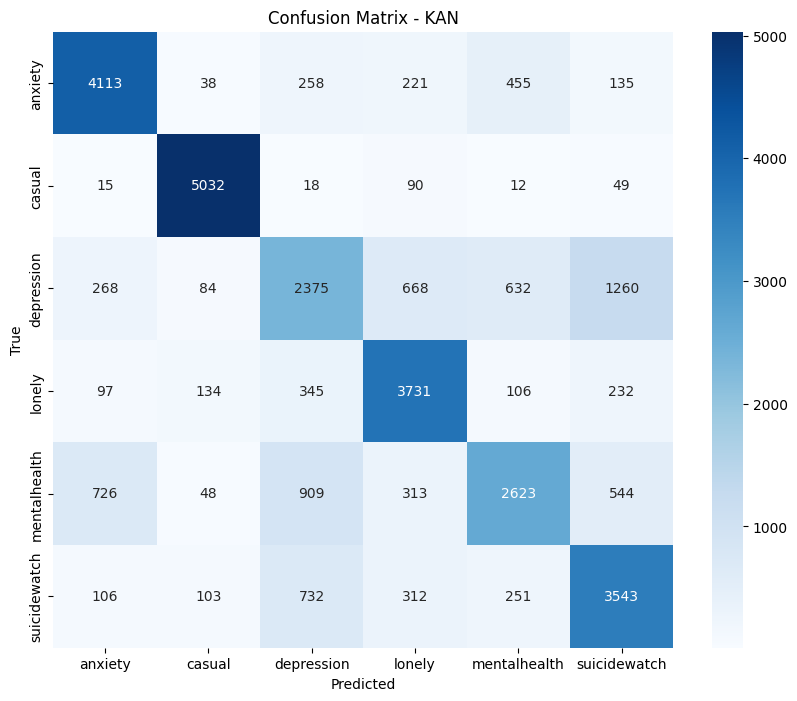

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_kan = kan_model.predict(X_test_tfidf)
y_pred_classes_kan = np.argmax(y_pred_kan, axis=1)

print(classification_report(y_test_encoded, y_pred_classes_kan, target_names=label_encoder.classes_))

conf_matrix_kan = confusion_matrix(y_test_encoded, y_pred_classes_kan)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_kan, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - KAN')
plt.show()


In [ ]:
import pickle

kan_model_path = 'kan_model.pkl'
with open(kan_model_path, 'wb') as file:
    pickle.dump(kan_model, file)

label_encoder_path = 'label_encoder.pkl'
with open(label_encoder_path, 'wb') as file:
    pickle.dump(label_encoder, file)


In [ ]:
def predict_subreddit(text):
    with open(kan_model_path, 'rb') as file:
        kan_model = pickle.load(file)
    with open(label_encoder_path, 'rb') as file:
        label_encoder = pickle.load(file)

    text_tfidf = vectorizer.transform([text]).toarray()

    prediction = kan_model.predict(text_tfidf)
    predicted_label = label_encoder.inverse_transform([np.argmax(prediction)])[0]

    return predicted_label


text = input("Enter a text: ")
predicted_subreddit = predict_subreddit(text)
print(f"The predicted subreddit is: {predicted_subreddit}")


Enter a text: it feels like to commit suicide
1/1 [==============================] - 0s 61ms/step
The predicted subreddit is: suicidewatch


In [ ]:
pip install keras pydot graphviz


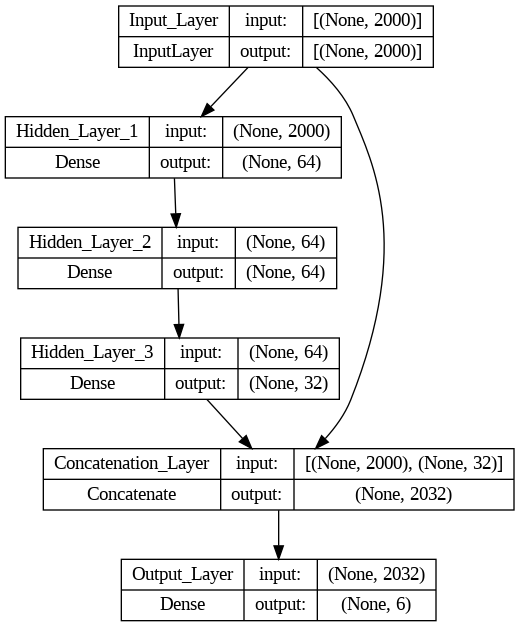

Epoch 1/3
7645/7645 [==============================] - 48s 6ms/step - loss: 0.8629 - accuracy: 0.6715 - val_loss: 0.7962 - val_accuracy: 0.7024
Epoch 2/3
7645/7645 [==============================] - 44s 6ms/step - loss: 0.7530 - accuracy: 0.7179 - val_loss: 0.7839 - val_accuracy: 0.7085
Epoch 3/3
7645/7645 [==============================] - 45s 6ms/step - loss: 0.7062 - accuracy: 0.7331 - val_loss: 0.7830 - val_accuracy: 0.7075


In [ ]:
from keras.models import Model
from keras.layers import Input, Dense, concatenate
from keras.utils import plot_model
from IPython.display import Image, display
import numpy as np

input_layer = Input(shape=(2000,), name="Input_Layer")

hidden1 = Dense(64, activation='relu', name="Hidden_Layer_1")(input_layer)
hidden2 = Dense(64, activation='relu', name="Hidden_Layer_2")(hidden1)

hidden3 = Dense(32, activation='relu', name="Hidden_Layer_3")(hidden2)

concat = concatenate([input_layer, hidden3], name="Concatenation_Layer")

output_layer = Dense(len(label_encoder.classes_), activation='softmax', name="Output_Layer")(concat)

kan_model = Model(inputs=input_layer, outputs=output_layer, name="Simplified_KAN_Model")

kan_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

plot_model(kan_model, to_file='kan_model_structure.png', show_shapes=True, show_layer_names=True)
display(Image(filename='kan_model_structure.png'))

history = kan_model.fit(X_train_tfidf, y_train_encoded, epochs=3, validation_data=(X_test_tfidf, y_test_encoded), batch_size=16)  # Smaller batch size


177/956 [====>.........................] - ETA: 2s

Exception ignored in: <function _xla_gc_callback at 0x7b56da782290>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 98, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


956/956 [==============================] - 50s 52ms/step
              precision    recall  f1-score   support

     anxiety       0.76      0.81      0.78      5220
      casual       0.94      0.96      0.95      5216
  depression       0.54      0.46      0.50      5287
      lonely       0.73      0.78      0.76      4645
mentalhealth       0.65      0.51      0.57      5163
suicidewatch       0.61      0.74      0.67      5047

    accuracy                           0.71     30578
   macro avg       0.70      0.71      0.70     30578
weighted avg       0.70      0.71      0.70     30578



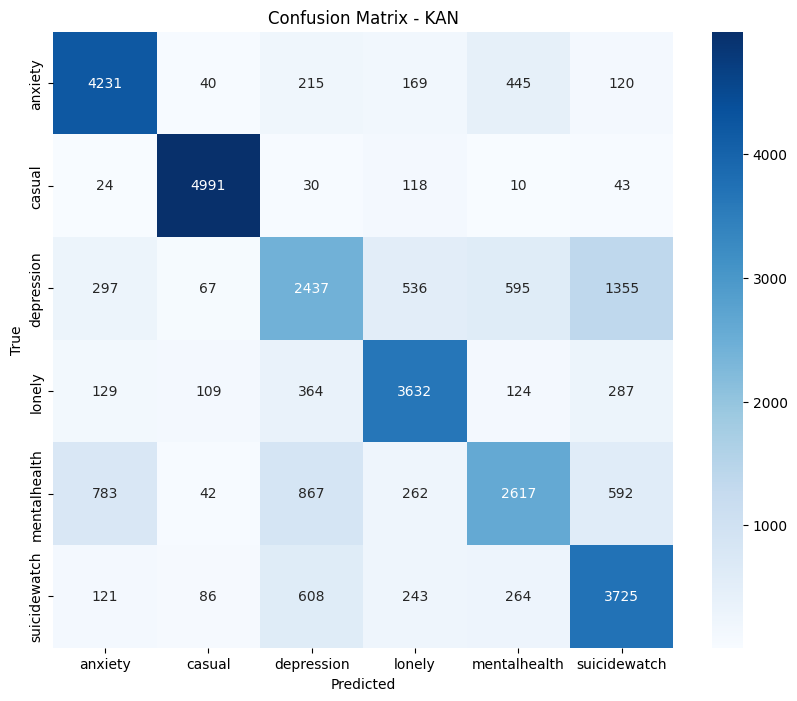

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_kan = kan_model.predict(X_test_tfidf)
y_pred_classes_kan = np.argmax(y_pred_kan, axis=1)

print(classification_report(y_test_encoded, y_pred_classes_kan, target_names=label_encoder.classes_))

conf_matrix_kan = confusion_matrix(y_test_encoded, y_pred_classes_kan)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_kan, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - KAN')
plt.show()
